# Movie data

The file 'MovieProfits.csv' contains data on 609 movies from the years 2008-2012, from the website rottentomatoes.com


For each Movie we have some information including: 
<ul>
    <li> The gross box office turnover (US Gross) in millions of dollars
    <li> The budget for making the movie, in millions of dollars
    <li> The duration or run time of the movie
    <li> The critics' score out of 100%
</ul>

You will complete a series of data analysis tasks as instructed in the questions below.

You will receive an overall grade from your tutor.

Each question-part carries roughly equal weight.

        
### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')

### Import and view the data

In [2]:
movies=pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/MovieProfits.csv')
movies

,Year,Movie,US Gross ($M),Budget ($M),Run Time (min),Critic Score (Rotten Tomatoes)
0,2012,Django Unchained,162.805434,100.0,165,88
1,2012,Parental Guidance,77.264926,25.0,105,18
2,2012,The Impossible,19.019882,40.0,114,81
3,2012,Jack Reacher,80.070736,60.0,130,61
4,2012,This is 40,67.544505,35.0,134,51
...,...,...,...,...,...,...
604,2008,Mad Money,20.688843,22.0,104,22
605,2008,27 Dresses,76.808654,30.0,111,41
606,2008,Cloverfield,80.048433,25.0,85,77
607,2008,In the Name of the King: A Dungeon Siege Tale,4.775656,60.0,127,4


#### a) Find and remove outliers

There are some erroneous values in the columns 'Year' and 'Run Time (min)'. 
<ul>
    <li>Find these and replace them with NaNs.
    <li>Briefly justify (in the text box below) which values you considered erroneous
</ul>

In [3]:
# Your code here to replace erroenous values with NaNs
# No need to show your working
movies.loc[(movies['Year']>2023),['Year']]=np.nan
movies.loc[(movies['Run Time (min)']==0),['Run Time (min)']]=np.nan

<font color='red'>
Three movies had a recorded run time of zero minutes - run times for these movies were set to NaN

One movie had a recorded release date in the far future (2110) - release date for this movie was set to NaN
</font>

In [8]:
movies.loc[(movies['Run Time (min)']<120)]

,Year,Movie,US Gross ($M),Budget ($M),Run Time (min),Critic Score (Rotten Tomatoes)
1,2012.0,Parental Guidance,77.264926,25.0,105.0,18
2,2012.0,The Impossible,19.019882,40.0,114.0,81
5,2012.0,The Guilt Trip,37.134215,40.0,95.0,38
7,2012.0,Playing for Keeps,13.102272,35.0,105.0,4
8,2012.0,Killing Them Softly,15.026056,15.0,97.0,75
...,...,...,...,...,...,...
603,2008.0,Rambo,42.754105,47.5,92.0,37
604,2008.0,Mad Money,20.688843,22.0,104.0,22
605,2008.0,27 Dresses,76.808654,30.0,111.0,41
606,2008.0,Cloverfield,80.048433,25.0,85.0,77


#### b) Plot the relationship between Budget and Gross Turnover

<ul>
    <li> Create a scatterplot showing the relationship between Budget and Gross Turnover
    <li> Add the line x=y so we can see which movies made a profit and which made a loss
</ul>

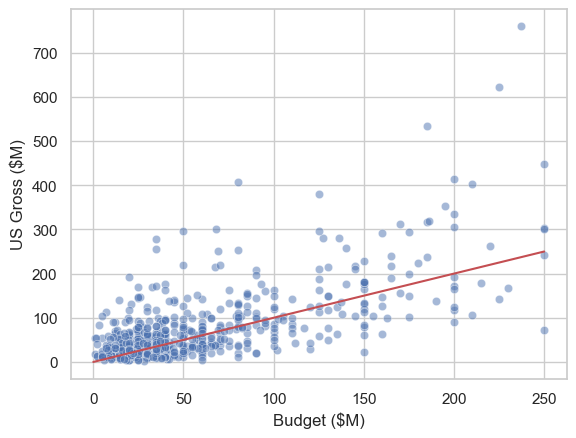

In [10]:
# make a scatterplot
sns.scatterplot(data=movies, x='Budget ($M)', y='US Gross ($M)', alpha=0.5)

# add the line x=y so we can see which movies made a profit and which made a loss
plt.plot([0,250],[0,250],'r')

#### c) Comment on the plot made in (b)
<ul>
    <li> Do movies with a higher budget have a higher gross turnover?
    <li> Do all movies make a profit or do some make a loss?
    <li> Comment on anything else you notice about the data distribution
</ul>
Support your answer with descriptive statistics where appropriate

In [31]:
# supporting calculations

print('number of loss making movies: ' + str(len(movies[movies['Budget ($M)']>movies['US Gross ($M)']])))
print('total number of movies: ' + str(len(movies)))

print('% with budget below $50M: ' + str(100* len(movies[movies['Budget ($M)']<50])/len(movies)))
print('% with budget below $100M: ' + str(100* len(movies[movies['Budget ($M)']<100])/len(movies)))

number of loss making movies: 252
total number of movies: 609
% with budget below $50M: 58.949096880131364
% with budget below $100M: 82.43021346469622


<font color='red'>
There is a fairly linear, positive relationship such that movies with a higher budget make a higher turnover
    
Quite a few movies (252/609) make a loss (turnover is less than budget - these datapoints fall below the red line)
    
Although the range of budgets (and profits) is large - up to about 250M budget and 700M profit, the majority of movies have much lower budgets - about 60\% have a budget below 50M and 80\% below 100M
</font>

#### d) Is there a correlation between Budget and Gross Turnover?

<ul>
<li>Calculate the correlation coefficient
<li>Briefly justify your choice of correlation method
</ul>

In [32]:
# your code here for the correlation
movies['US Gross ($M)'].corr(movies['Budget ($M)'], method='spearman')

0.6084125250514073

<font color='red'>
I used Spearman's correlation due to heteroscedasticity in the dataset 
</font>

#### e) Add a column to the dataframe for 'Profit ($M)'
 ... Where profit is defined as Gross Turnover minus Budget

In [34]:
# Your code here to add the column ['Profit ($M)']
movies['Profit ($M)']=movies['US Gross ($M)']-movies['Budget ($M)']

# Display the dataframe with the new column included
movies

,Year,Movie,US Gross ($M),Budget ($M),Run Time (min),Critic Score (Rotten Tomatoes),Profit ($M)
0,2012.0,Django Unchained,162.805434,100.0,165.0,88,62.805434
1,2012.0,Parental Guidance,77.264926,25.0,105.0,18,52.264926
2,2012.0,The Impossible,19.019882,40.0,114.0,81,-20.980118
3,2012.0,Jack Reacher,80.070736,60.0,130.0,61,20.070736
4,2012.0,This is 40,67.544505,35.0,134.0,51,32.544505
...,...,...,...,...,...,...,...
604,2008.0,Mad Money,20.688843,22.0,104.0,22,-1.311157
605,2008.0,27 Dresses,76.808654,30.0,111.0,41,46.808654
606,2008.0,Cloverfield,80.048433,25.0,85.0,77,55.048433
607,2008.0,In the Name of the King: A Dungeon Siege Tale,4.775656,60.0,127.0,4,-55.224344


#### f) What is the relationship between Budget and Profit

<ul>
<li> Create a scatterplot for Budget vs Profit
<li> Calculate the correlation between Budget and Profit using both Pearson's and Spearman's correlation coefficient. 
    <ul> 
        <li>Comment on the difference in results and why it might occur
        <li> Which approach is more appropriate and why?
    </ul>
</ul>

-0.17185721736298942

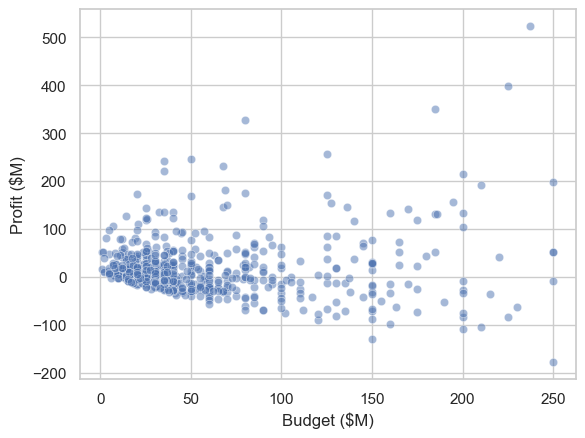

In [71]:
# Your code here for the scatterplot
sns.scatterplot(data=movies, x='Budget ($M)', y='Profit ($M)', alpha=0.5)

In [36]:
# Your code here for the correlations
print("Spearman's r")
print(movies['Budget ($M)'].corr(movies['Profit ($M)'], method='spearman'))

print("Pearson's r")
print(movies['Budget ($M)'].corr(movies['Profit ($M)'], method='pearson'))

Spearman's r
-0.17185721736298942
Pearson's r
0.07078101507174157


<font color='red'>
There appears to be a very weak positive correlation using Pearson's, but a very weak negative one using Spearman's. 

Pearsons's r will be influenced by strong positive outliers (movies with high budget and profit; Spearman's will be less influenced by outliers

Spearman's definitely more appropriate due to heteroscedasticity
</font>

#### g) Add a column containing Profit per $ of budget

This should be defined as Profit/Budget

In [38]:
# Your code here to add the column ['Profit ($M)']
movies['Profit per $']=movies['Profit ($M)']/movies['Budget ($M)']

#### i) Plot histograms of profit per dollar budget

Create three histograms containing the distribution of profit per dollar budget for:
<ul>
<li> All movies
<li> Movies with a budget below \$50M
<li> Movies with a budget above \$100M
</ul>
Make them as three subplots in a single figure to keep things tidy

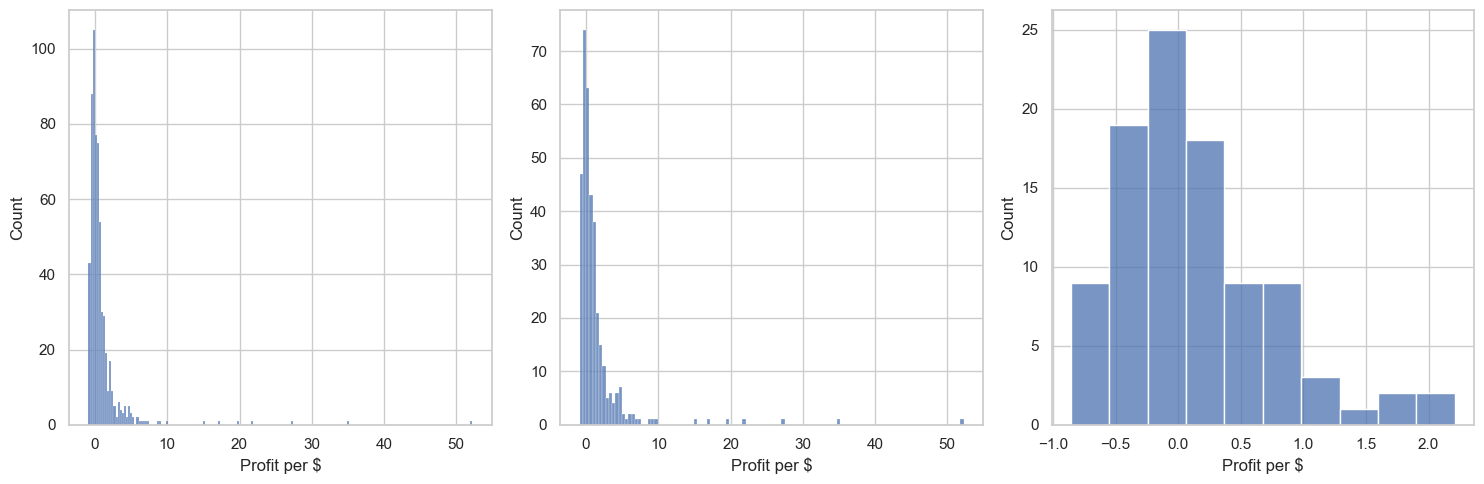

In [44]:
# Your code here
plt.figure(figsize=[15,5]) # set figure size

plt.subplot(1,3,1)
sns.histplot(data=movies, x='Profit per $')

plt.subplot(1,3,2)
sns.histplot(data=movies[movies['Budget ($M)']<50], x='Profit per $')

plt.subplot(1,3,3)
sns.histplot(data=movies[movies['Budget ($M)']>100], x='Profit per $')

plt.tight_layout()

#### j) 95% confidence interval for the mean profit per dollar

Create a bootstrapped confidence interval for the mean profit per dollar, separately for 
<ul>
    <li> Movies with a budget below \$50M
    <li> Movies with a budget above \$100M
</ul>

In [51]:
#### Your code here for the 95% confidence interval: Movies with a budget below $50M 
nReps = 10000
m = np.empty(nReps)
n = len(movies[movies['Budget ($M)']<50])

for i in range(nReps):
    sample=movies[movies['Budget ($M)']<50].sample(n, replace=True)
    m[i]=sample['Profit per $'].mean()
    
print('95% CI: [' + str(np.quantile(m, 0.025)) + ',' + str(np.quantile(m, 0.975)) + ']')


95% CI: [1.0132826583131334,1.9148265630973411]


In [52]:
#### Your code here for the 95% confidence interval: Movies with a budget above $100M 
nReps = 10000
m = np.empty(nReps)
n = len(movies[movies['Budget ($M)']>100])

for i in range(nReps):
    sample=movies[movies['Budget ($M)']>100].sample(n, replace=True)
    m[i]=sample['Profit per $'].mean()
    
print('95% CI: [' + str(np.quantile(m, 0.025)) + ',' + str(np.quantile(m, 0.975)) + ']')


95% CI: [0.006456949418855058,0.24922863184764985]


#### k) Comment on the confidence intervals obtained in the previous question.

The mean is also called the expected value - so the mean profit per dollar is also the expected profit per dollar (if we were to make a new movie). 

<ul>
<li>Is the expected profit per dollar higher for low- or high- budget movies?
<li>Is the expected profit per dollar more uncertain/variable for low- or high- budget movies?
</ul>

<font color='red'>
The mean profit per dollar is higher for lower budget movies, but the CI is wider suggesting that the expected (mean) profit per dollar is also more variable for lower budget movies (as some movies gross many times their (small) budget)
</font>